# Algoritmos - Actividad Guiada 2

**Nombre:**     Raul Reyero Diez<br>
**Link:**       https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>

**Solución:**   https://github.com/bonafedeaviu/Algoritmos


In [1]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

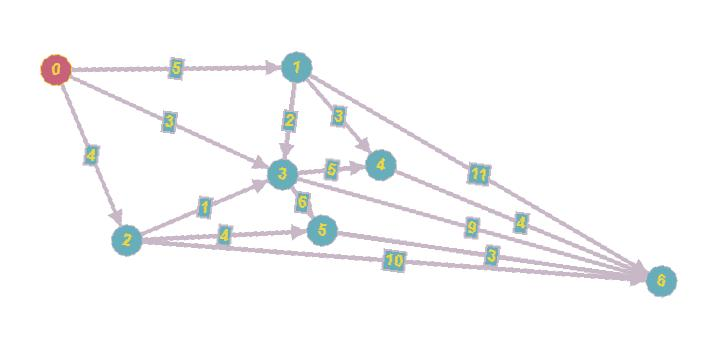

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [8]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
import timeit

def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )

def ejecutar():
    ramificacion_y_poda(COSTES)
    
tiempo = timeit.timeit('ejecutar()', globals=globals(), number=1)

print(f"Tiempo total de ejecución: {tiempo:.8f} segundos")


La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
Tiempo total de ejecución: 0.00036050 segundos


## Pasos del algoritmo de Kuhn-Munkres (Hungarian)

1.	Restar el mínimo de cada fila:
    - Para cada fila de la matriz de costos, resta el valor mínimo de esa fila a cada elemento de la misma. Esto asegura que al menos un cero aparezca  en cada fila.    
2.	Restar el mínimo de cada columna:
    - Después de haber modificado las filas, para cada columna de la matriz, resta el valor mínimo de esa columna a cada elemento de la misma. Esto asegura que al menos un cero aparezca en cada columna.    
3.	Cubrir ceros con líneas:
    - Encuentra un conjunto de ceros en la matriz de costo de forma que, por lo menos, cada cero esté cubierto por una línea, ya sea horizontal o vertical.
    - Marcar los ceros: Encuentra los ceros y marca aquellas filas y columnas que contienen ceros, es decir, cubre las filas o columnas que tienen ceros de manera tal que no hay ceros "sin cubrir".      
4.	Asignación de ceros (Paso de las estrellas):
    - Encuentra ceros no cubiertos en la matriz y "asígnalos" a las tareas. Marca estos ceros como estrellas.
    - Cuando un cero es asignado a una tarea (marcado como estrella), cubre la fila de ese cero (es decir, marca la fila como cubierta) y no cubras la columna del cero.      
5.	Cubrir las columnas con estrellas:
    - Cubre las columnas que contienen estrellas. Es decir, cubre todas las columnas que contienen un cero que ya ha sido asignado.      
6.	Repetir hasta que todas las columnas estén cubiertas:
    - Repite este proceso hasta que todas las columnas estén cubiertas. Esto asegura que todos los ceros estén cubiertos de forma óptima y que se haya  asignado una tarea a cada agente.      
7.	Ajuste de la matriz:
    - Si aún no se han cubierto todas las columnas, es necesario realizar un ajuste en la matriz:
      - Encuentra el valor mínimo en la matriz que no está cubierto ni por una fila ni por una columna.
      - Resta ese valor a todos los elementos no cubiertos, y suma ese mismo valor a todos los elementos que están cubiertos por ambas, una fila y una columna.    
8.	Construir el resultado:
    - Finalmente, selecciona las tareas asignadas a los agentes, es decir, aquellas que están marcadas con una estrella. Esto te dará la asignación óptima que minimiza el coste total.
  

**Fuerza bruta**        O(n!) -peor caso-
**Algoritmo Húngaro**   O(n<sup>3</sup>)


In [12]:
import copy
import timeit

def hungarian_algorithm(cost_matrix):
    n = len(cost_matrix)
    cost = copy.deepcopy(cost_matrix) # copia independiente

    # Paso 1: Restar el mínimo de cada fila
    for i in range(n):
        min_val = min(cost[i])
        for j in range(n):
            cost[i][j] -= min_val

    # Paso 2: Restar el mínimo de cada columna
    for j in range(n):
        col = [cost[i][j] for i in range(n)]
        min_val = min(col)
        for i in range(n):
            cost[i][j] -= min_val

    # Paso 3 en adelante: cubrir ceros, construir máscara y encontrar caminos alternantes
    # Usamos una máscara y vectores para marcar filas/columnas cubiertas
    mask = [[0]*n for _ in range(n)]
    row_cover = [False]*n
    col_cover = [False]*n

    def find_zero():
        for i in range(n):
            for j in range(n):
                if cost[i][j] == 0 and not row_cover[i] and not col_cover[j]:
                    return i, j
        return -1, -1

    # Paso 3: cubrir ceros independientes
    for i in range(n):
        for j in range(n):
            if cost[i][j] == 0 and not row_cover[i] and not col_cover[j]:
                mask[i][j] = 1  # Estrella
                row_cover[i] = True
                col_cover[j] = True

    row_cover = [False]*n
    col_cover = [False]*n

    def cover_columns_with_stars():
        for i in range(n):
            for j in range(n):
                if mask[i][j] == 1:
                    col_cover[j] = True

    def all_columns_covered():
        return sum(col_cover) == n

    def find_star_in_row(row):
        for j in range(n):
            if mask[row][j] == 1:
                return j
        return -1

    def find_star_in_col(col):
        for i in range(n):
            if mask[i][col] == 1:
                return i
        return -1

    def find_prime_in_row(row):
        for j in range(n):
            if mask[row][j] == 2:
                return j
        return -1

    def augment_path(path):
        for (r, c) in path:
            if mask[r][c] == 1:
                mask[r][c] = 0
            else:
                mask[r][c] = 1

    def clear_covers():
        for i in range(n):
            row_cover[i] = False
        for j in range(n):
            col_cover[j] = False

    def erase_primes():
        for i in range(n):
            for j in range(n):
                if mask[i][j] == 2:
                    mask[i][j] = 0

    cover_columns_with_stars()

    while not all_columns_covered():
        done = False
        while not done:
            row, col = find_zero()
            if row == -1:
                done = True
                # Paso 6: ajustar la matriz
                minval = min([cost[i][j] for i in range(n) for j in range(n) if not row_cover[i] and not col_cover[j]])
                for i in range(n):
                    if row_cover[i]:
                        for j in range(n):
                            cost[i][j] += minval
                    if not col_cover[j]:
                        cost[i][j] -= minval
            else:
                mask[row][col] = 2  # Primo
                star_col = find_star_in_row(row)
                if star_col != -1:
                    row_cover[row] = True
                    col_cover[star_col] = False
                else:
                    # construir camino alternante
                    path = [(row, col)]
                    done = True
                    while True:
                        r = find_star_in_col(path[-1][1])
                        if r == -1:
                            break
                        path.append((r, path[-1][1]))
                        c = find_prime_in_row(r)
                        path.append((r, c))
                    augment_path(path)
                    clear_covers()
                    erase_primes()
                    cover_columns_with_stars()

    # Construir resultado
    assignments = []
    for i in range(n):
        for j in range(n):
            if mask[i][j] == 1:
                assignments.append((i, j))
    return assignments

# Las Filas [0,1,2,3] representan las tareas y las columnas [0,1,2,3] representan los Agentes
COSTES = [
    [11, 12, 18, 40],
    [14, 15, 13, 22],
    [11, 17, 19, 23],
    [17, 14, 20, 28]
]

def ejecutar():
    resultado = hungarian_algorithm(COSTES)
    coste_total = sum(COSTES[i][j] for i, j in resultado)
    print("Asignaciones óptimas (tarea -> agente):")
    for tarea, agente in resultado:
        print(f"Tarea {tarea} -> Agente {agente} (Coste: {COSTES[tarea][agente]})")
    print(f"\nCoste total mínimo: {coste_total}")

tiempo = timeit.timeit('ejecutar()', globals=globals(), number=1)
print(f"Tiempo total de ejecución: {tiempo:.8f} segundos")

Asignaciones óptimas (tarea -> agente):
Tarea 0 -> Agente 0 (Coste: 11)
Tarea 1 -> Agente 2 (Coste: 13)
Tarea 2 -> Agente 3 (Coste: 23)
Tarea 3 -> Agente 1 (Coste: 14)

Coste total mínimo: 61
Tiempo total de ejecución: 0.00019590 segundos


## Descenso del gradiente

In [13]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [14]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

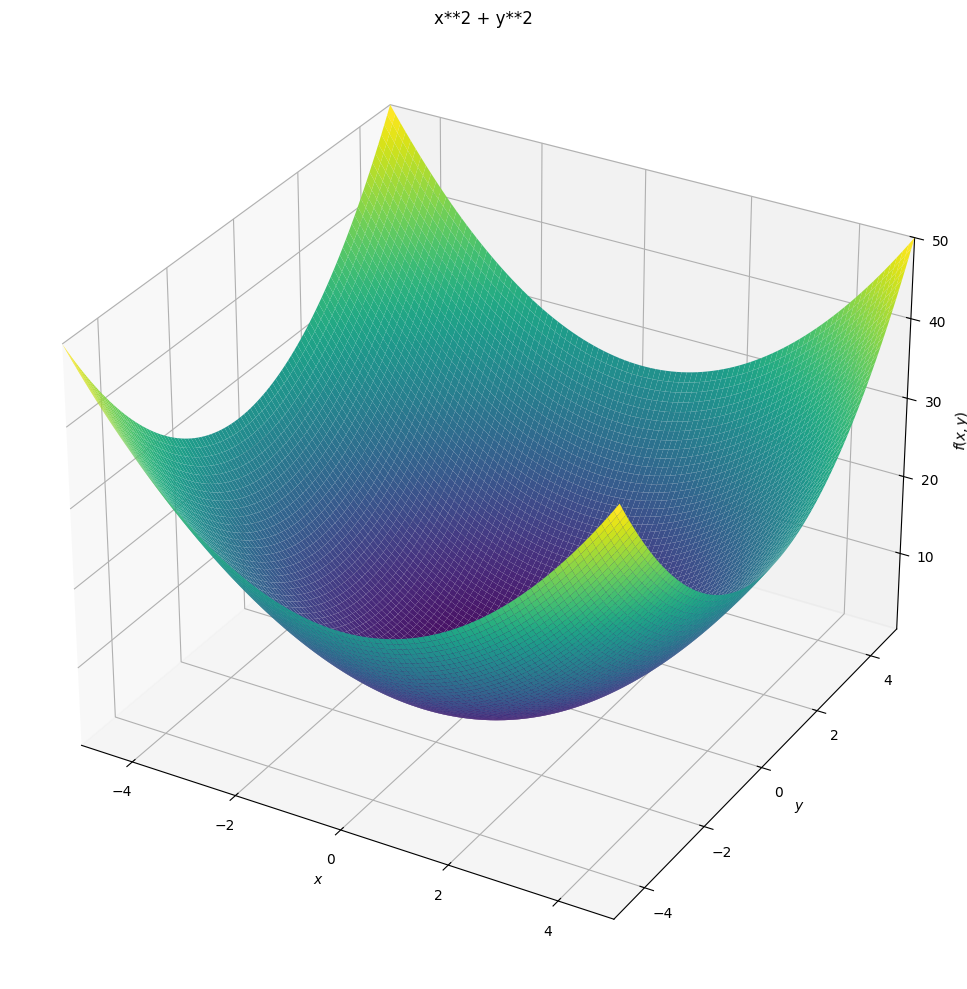

In [15]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

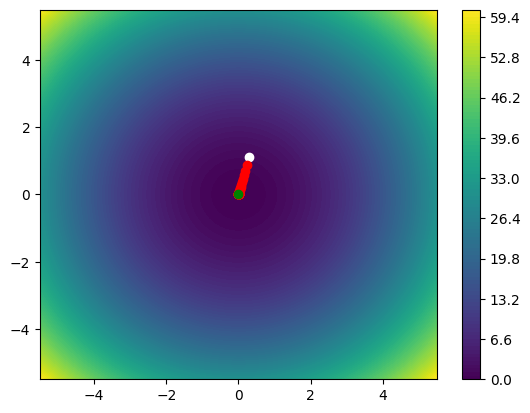

Solucion: [4.05264636484883e-06, 1.5798759042196003e-05] 2.660247298318924e-10


In [16]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
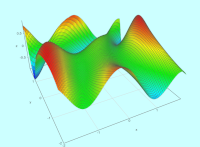


In [17]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

![Derivada](derivada1.jpg)

In [18]:
#Definimos la funcion derivada

## Original 
#df = lambda X:-2 * math.sin(0.5 * X**2 - 0.25 * y**2 + 3) * math.sin(2 * X + 1 - math.exp(y)) + \
#           X * math.cos(0.5 * X**2 - 0.25 * y**2 + 3) * math.cos(2 * X + 1 - math.exp(y))

## Transformada a Numpy
df = lambda X, y: -2 * np.sin(0.5 * np.array(X)**2 - 0.25 * y**2 + 3) * np.sin(2 * np.array(X) + 1 - np.exp(y)) + \
                   np.array(X) * np.cos(0.5 * np.array(X)**2 - 0.25 * y**2 + 3) * np.cos(2 * np.array(X) + 1 - np.exp(y))

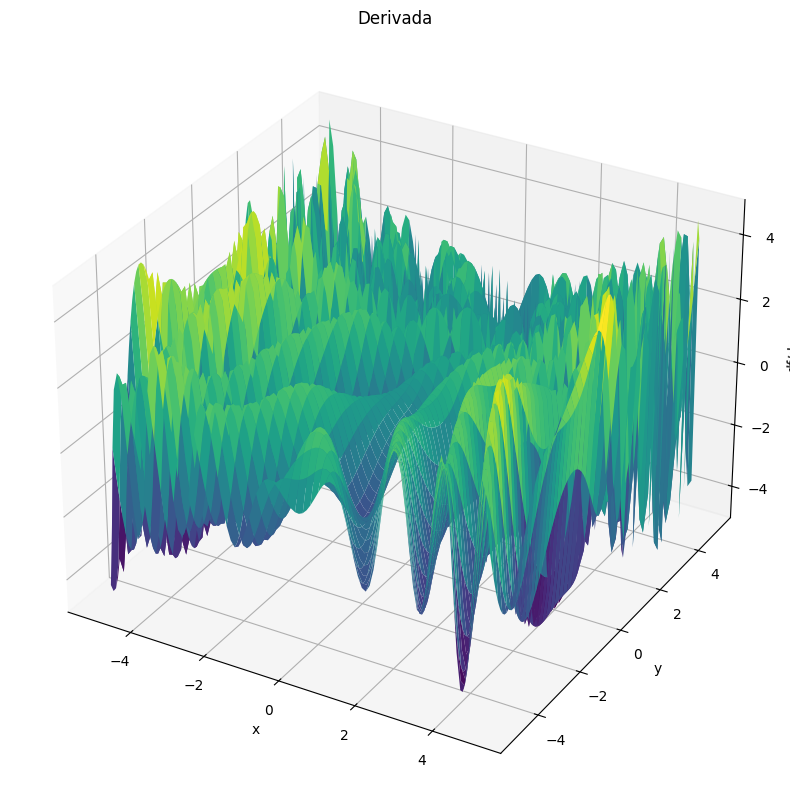

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los valores de x e y
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Definir la función derivada manualmente
def df_dx(x, y):
    return -2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)) + \
           x * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Evaluar la función en los puntos de la malla
Z = df_dx(X, Y)

# Graficar
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Derivada')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('df/dx')

plt.show()

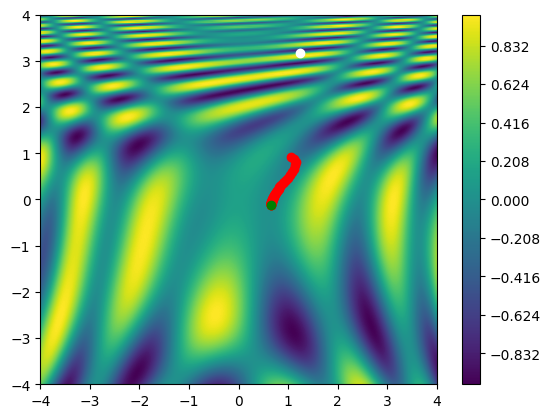

Solución: [np.float64(0.6431438084501742), np.float64(-0.11933591038284651)] -0.010548426100420224


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definir la función original usando numpy
def f(P):
    x, y = P
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Definir la función derivada correctamente
def df(P):
    x, y = P
    return np.array([
        -2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)) + \
        x * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)),
        
        # Derivada con respecto a y (si es necesaria)
        -0.25 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) - \
        np.exp(y) * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))
    ])

# Preparar los datos para el mapa de niveles
resolucion = 300
rango = 4

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Dibujar el mapa de niveles
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generar un punto aleatorio inicial
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje
TA = 0.1

# Iteraciones
for _ in range(50):
    grad = df(P)  # Ahora df devuelve un array con [df/dx, df/dy]
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujar el punto final en verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solución:", P, f(P))